In [1]:

import pandas as pd
from sklearn.linear_model import LinearRegression

# Q1 — Multiple Linear Regression: House Price Prediction
df = pd.read_csv("q1_house_price.csv")
X = df[['Size', 'Bedrooms', 'Age']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
for feat, coef in zip(X.columns, model.coef_):
    print(f'Coefficient for {feat}: {coef:.2f}')

# Predict for requested house
new_house = [[2000, 3, 10]]
pred_price = model.predict(new_house)
print(f'Predicted price for Size=2000, Bedrooms=3, Age=10: ${pred_price[0]:.2f}')


Intercept: -183199.00361700682
Coefficient for Size: 35.09
Coefficient for Bedrooms: 105082.92
Coefficient for Age: 11660.75
Predicted price for Size=2000, Bedrooms=3, Age=10: $318834.03


c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R^2 score: 0.9980650442807174
Mean Squared Error: 0.3466666666666657


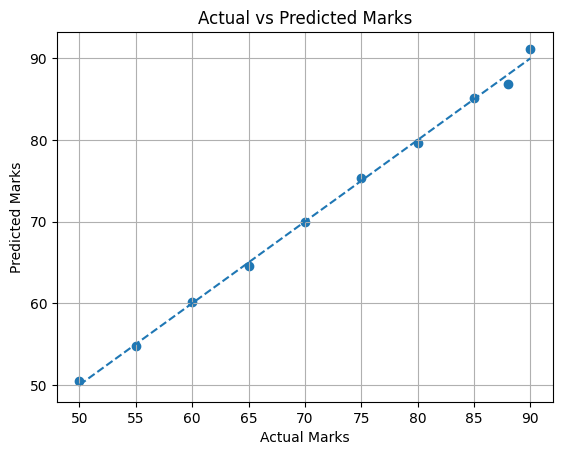

In [7]:

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Q2 — Multiple Linear Regression: Student Performance
df = pd.read_csv("q2_student_performance.csv")
X = df[['HoursStudy','HoursSleep','Attendance']]
y = df['Marks']

model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)

print('R^2 score:', r2_score(y, preds))
print('Mean Squared Error:', mean_squared_error(y, preds))

# Plot actual vs predicted
plt.scatter(y, preds)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.grid(True)
plt.show()


c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Probability of passing if HoursStudy=30 and HoursSleep=6: 0.995


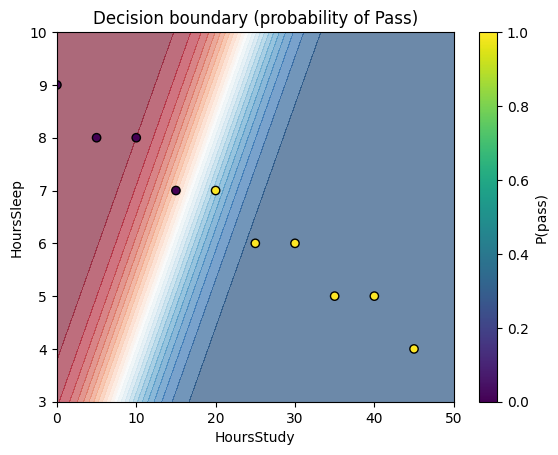

In [3]:

import numpy as np
from sklearn.linear_model import LogisticRegression

# Q3 — Logistic Regression: Pass/Fail Classification
df = pd.read_csv("q3_pass_fail.csv")
X = df[['HoursStudy','HoursSleep']]
y = df['Pass']

clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)

prob = clf.predict_proba([[30, 6]])[0,1]
print(f'Probability of passing if HoursStudy=30 and HoursSleep=6: {prob:.3f}')

# Decision boundary plot
xx0, xx1 = np.meshgrid(
    np.linspace(0, 50, 200),
    np.linspace(3, 10, 200)
)
grid = np.c_[xx0.ravel(), xx1.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx0.shape)

plt.contourf(xx0, xx1, probs, levels=25, cmap='RdBu', alpha=0.6)
plt.scatter(X['HoursStudy'], X['HoursSleep'], c=y, edgecolors='k')
plt.xlabel('HoursStudy')
plt.ylabel('HoursSleep')
plt.title('Decision boundary (probability of Pass)')
plt.colorbar(label='P(pass)')
plt.show()


In [4]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Q4 — Logistic Regression: Diabetes Prediction
df = pd.read_csv("q4_diabetes.csv")
X = df[['BMI','Age','Glucose']]
y = df['Diabetic']

clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)

preds = clf.predict(X)
print('Accuracy:', accuracy_score(y, preds))
print('Precision:', precision_score(y, preds))
print('Recall:', recall_score(y, preds))
print('\nFull classification report:\n', classification_report(y, preds))

# Predict sample patient
sample = [[28, 45, 150]]
prob = clf.predict_proba(sample)[0,1]
label = clf.predict(sample)[0]
print(f'P(diabetic) for BMI=28, Age=45, Glucose=150: {prob:.3f} -> Predicted label: {label}')


Accuracy: 0.9
Precision: 0.8571428571428571
Recall: 1.0

Full classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

P(diabetic) for BMI=28, Age=45, Glucose=150: 0.997 -> Predicted label: 1


c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [5]:

# Q5 — Comparison: Linear vs Logistic Regression
df = pd.read_csv("q5_comparison.csv")

# Linear Regression to predict scores
lr = LinearRegression()
lr.fit(df[['HoursStudy']], df['ExamScore'])
score_preds = lr.predict(df[['HoursStudy']])
print('Linear regression MSE:', mean_squared_error(df['ExamScore'], score_preds))

# Logistic Regression to predict pass/fail
log = LogisticRegression(solver='liblinear')
log.fit(df[['HoursStudy']], df['Pass'])
class_preds = log.predict(df[['HoursStudy']])
print('Logistic regression accuracy (predicting pass/fail):', accuracy_score(df['Pass'], class_preds))

# Demonstrate why linear regression is unsuitable for classification
new_hours = np.array([[20], [0]])
linear_pred_scores = lr.predict(new_hours)
logit_pred_probs = log.predict_proba(new_hours)[:,1]
print('\nFor HoursStudy=20, linear predicts exam score:', linear_pred_scores[0])
print('For HoursStudy=20, logistic predicts P(pass)=', logit_pred_probs[0])


Linear regression MSE: 5.048709793414476e-29
Logistic regression accuracy (predicting pass/fail): 0.8

For HoursStudy=20, linear predicts exam score: 140.0
For HoursStudy=20, logistic predicts P(pass)= 0.9998606359212698


c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Marria Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
